<a href="https://colab.research.google.com/github/chengyang122/Metter.js-and-MediaPipe-Interactive-game/blob/main/NewMetrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# install dependencies: (use cu111 because colab has CUDA 11.1)
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html

# install mmcv-full thus we could use CUDA operators
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html

# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

!pip install -e .

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████                   | 834.1 MB 1.3 MB/s eta 0:15:04tcmalloc: large alloc 1147494400 bytes == 0x3a912000 @  0x7f13894ae615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |████████████████▌               | 1055.7 MB 1.3 MB/s eta 0:12:18tcmalloc: large alloc 1434370048 bytes == 0x7ef68000 @  0x7f13894ae615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |█████████████████████           | 1336.2 MB 1.2 MB/s eta 0:09:33tcmalloc: large alloc 1792966656 bytes =

In [48]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
import numpy as np
import json
import pandas as pd
import cv2
# Check MMDetection installation
import mmdet
print(mmdet.__version__)
import pickle 
import mmcv
from mmcv.runner import load_checkpoint

import matplotlib.pyplot as plt

from mmdet.apis import inference_detector, show_result_pyplot
from mmdet.models import build_detector
# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow
# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.9.0+cu111 True
2.24.1
11.1
GCC 7.3


In [ ]:
#for inference

img = mmcv.imread('/content/drive/MyDrive/barcode/Ananya.zip (Unzipped Files)/20170614-19_15_57-raspberrypi-camC_undistored.jpg')
model = pickle.load(open('/content/drive/MyDrive/barcode/mdl.pkl','rb'))
cfg = pickle.load(open('/content/drive/MyDrive/barcode/cfg.pkl','rb'))


model.cfg = cfg
result = inference_detector(model, img)
show_result_pyplot(model, img, result)

In [32]:
base = '/content/drive/MyDrive/barcode/Ananya.zip (Unzipped Files)/'

In [22]:
df = pd.read_excel('/content/drive/MyDrive/barcode/AnanyaAnnotation_10-09-2017.xlsx') # read the annotation file 
image_name = df.loc[:, 'Image Filename'].unique() # get unique item in one column 
df2 = df[df.loc[:, 'Image Filename']==image_name[3]] # choose data of one image 

In [30]:
df2 = df[df.loc[:, 'Image Filename']==image_name[3]]

In [82]:
img.shape

(1944, 2592, 3)

In [ ]:
imgAddress = base + image_name[3] + '.jpg'
img = mmcv.imread(imgAddress)
model.cfg = cfg
result = inference_detector(model, img)
#show_result_pyplot(model, img, result)


In [72]:
#collect all image
Object, Mask = result

useful_index = []
for i in range(len(Object[0])):
  score = Object[0][i][4]
  if score > 0.9:
    useful_index.append(i)

In [ ]:
import numpy
import cv2
from google.colab.patches import cv2_imshow

rec1 = df2.iloc[0, :]
true_contours = [np.array([[rec1.X1,rec1.Y1],[rec1.X2,rec1.Y2],[rec1.X3,rec1.Y3], [rec1.X4,rec1.Y4]], dtype=np.int32)]
drawing = numpy.zeros([1944, 2592],numpy.uint8)
# for cnt in contours:
#     cv2.drawContours(drawing,[cnt],0,(255,255,255),2)
# cv2_imshow(drawing)

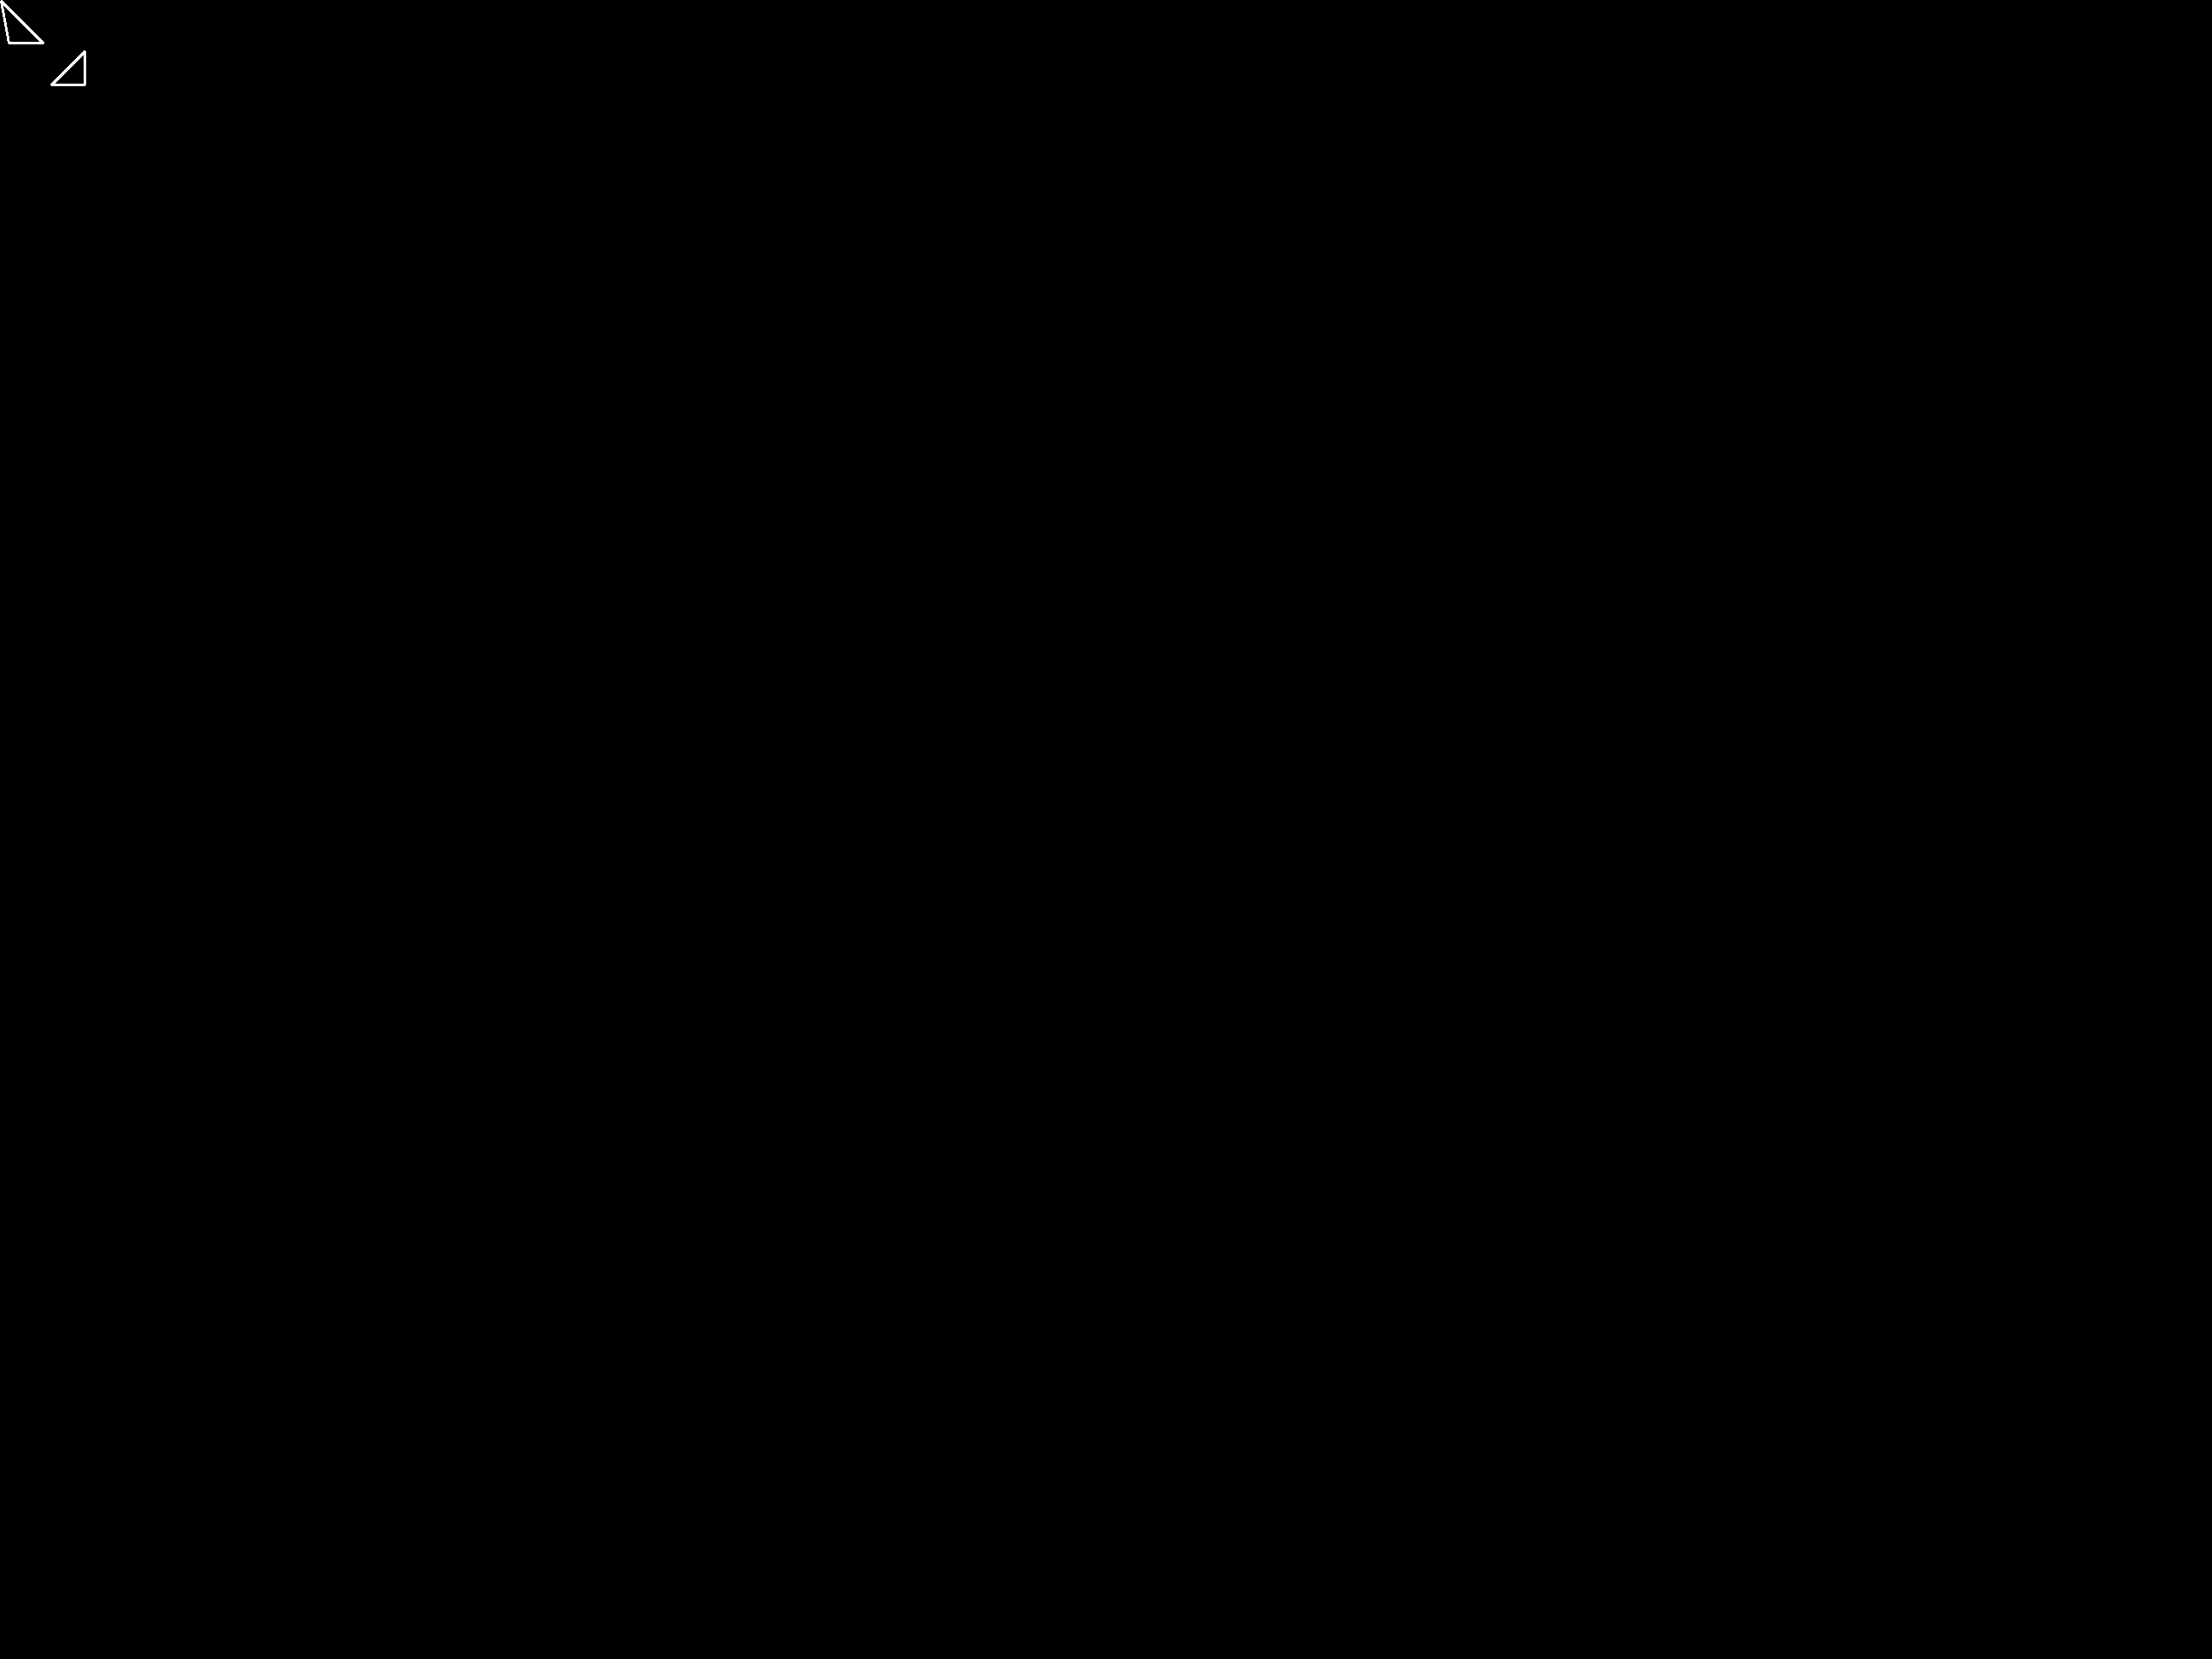

-1

In [83]:
import numpy
import cv2
from google.colab.patches import cv2_imshow
contours = [numpy.array([[1,1],[10,50],[50,50]], dtype=numpy.int32) , numpy.array([[99,99],[99,60],[60,99]], dtype=numpy.int32)]

drawing = numpy.zeros([1944, 2592],numpy.uint8)
for cnt in contours:
    cv2.drawContours(drawing,[cnt],0,(255,255,255),2)

cv2_imshow(drawing)
cv2.waitKey(0)